In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [4]:
data = pandas.read_csv('StudentStatistics.csv', sep = ';')
data.head()

,RespNr,Location,OAA_ObjCourse,OAA_ObjClass,OAA_CourseExec,OAA_RelActObj,OAA_RelActExa,OAA_RelObjExa,OAA_LearProcAct,OAA_LearProcPrep,...,Mix_IntDiscus,Mix_IntPrep,Mix_IntExcel,Over_Grade,Gen_Gender,Gen_Age,Gen_SecSchool,Gen_Classes,Gen_NumberSubj,Gen_Time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20


In [5]:
# H0 - There is no relation between the teaching motivation and the theory knowledge grasped
# H0 - There is a relation between the teaching motivation and the theory knowledge grasped

# Creating a crosstab between the two ordinal data columns Teach_Motivate and Teach_LinkTheory

dataviz = pandas.crosstab(data['Teach_Motivate'], data['Teach_LinkTheory'])
dataviz

Teach_LinkTheory,Agree,Disagree,Fully Disagree,Fully agree,Neither disagree nor agree
Teach_Motivate,,,,,
Agree,4,0,0,0,3
Disagree,1,5,1,0,2
Fully Disagree,0,7,10,0,3
Fully agree,1,0,0,5,0
Neither disagree nor agree,2,0,0,2,8


<function matplotlib.pyplot.show(close=None, block=None)>

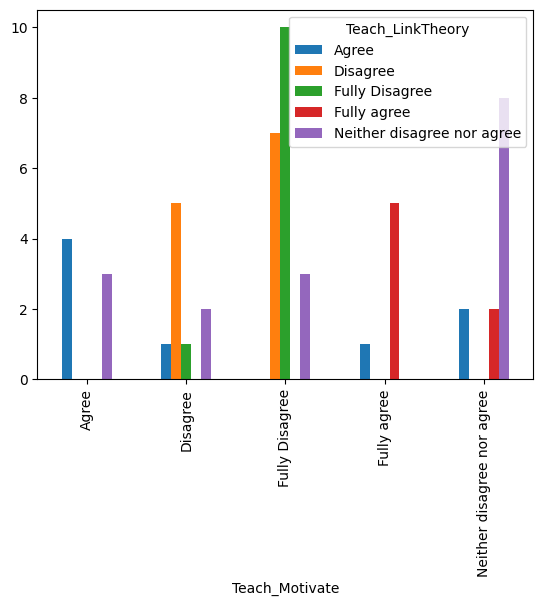

In [6]:
# Plotting a bar graph

dataviz.plot(kind = 'bar')
plt.show

In [7]:
# Implementing the Goodman Kruskal gamma test

from scipy.stats import norm

def goodmanKruskalgamma(data, ordinal1, ordinal2, orderLabels1, orderLabels2=None):
    myCrosstable = pandas.crosstab(data[ordinal1], data[ordinal2])

    myCrosstable = myCrosstable.reindex(orderLabels1)

    if orderLabels2 == None:
        myCrosstable = myCrosstable[orderLabels1]
    else:
        myCrosstable = myCrosstable[orderLabels2]

    nRows = myCrosstable.shape[0]
    nCols = myCrosstable.shape[1]


    C = [[0 for x in range(nCols)] for y in range(nRows)]

    # top left part
    for i in range(nRows):
        for j in range(nCols):
            h = i-1
            k = j-1
            if h>=0 and k>=0:
                for p in range(h+1):
                    for q in range(k+1):
                        C[i][j] = C[i][j] + list(myCrosstable.iloc[p])[q]

    # bottom right part
    for i in range(nRows):
        for j in range(nCols):
            h = i+1
            k = j+1
            if h<nRows and k<nCols:
                for p in range(h, nRows):
                    for q in range(k, nCols):
                        C[i][j] = C[i][j] + list(myCrosstable.iloc[p])[q]

    D = [[0 for x in range(nCols)] for y in range(nRows)]

    # bottom left part
    for i in range(nRows):
        for j in range(nCols):
            h = i+1
            k = j-1
            if h<nRows and k>=0:
                for p in range(h, nRows):
                    for q in range(k+1):
                        D[i][j] = D[i][j] + list(myCrosstable.iloc[p])[q]

    # top right part
    for i in range(nRows):
        for j in range(nCols):
            h = i-1
            k = j+1
            if h>=0 and k<nCols:
                for p in range(h+1):
                    for q in range(k, nCols):
                        D[i][j] = D[i][j] + list(myCrosstable.iloc[p])[q]

    P = 0
    Q = 0
    for i in range(nRows):
        for j in range(nCols):
            P = P + C[i][j] * list(myCrosstable.iloc[i])[j]
            Q = Q + D[i][j] * list(myCrosstable.iloc[i])[j]

    GKgamma = (P - Q) / (P + Q)

    if abs(GKgamma) < .10:
        qual = 'Negligible'
    elif abs(GKgamma) < .20:
        qual = 'Weak'
    elif abs(GKgamma) < .40:
        qual = 'Moderate'
    elif abs(GKgamma) < .60:
        qual = 'Relatively strong'
    elif abs(GKgamma) < .80:
        qual = 'Strong'
    else:
        qual = 'Very strong'

    n = myCrosstable.sum().sum()

    Z1 = GKgamma * ((P + Q) / (n * (1 - GKgamma**2)))**0.5

    forASE0 = 0
    forASE1 = 0
    for i in range(nRows):
        for j in range(nCols):
            forASE0 = forASE0 + list(myCrosstable.iloc[i])[j] * (Q * C[i][j] - P * D[i][j])**2
            forASE1 = forASE1 + list(myCrosstable.iloc[i])[j] * (C[i][j] - D[i][j])**2

    ASE0 = 4 * (forASE0)**0.5 / (P + Q)**2
    ASE1 = 2 * (forASE1 - (P - Q)**2 / n)**0.5 / (P + Q)
    Z2 = GKgamma / ASE0
    Z3 = GKgamma / ASE1

    p1 = norm.sf(Z1)
    p2 = norm.sf(Z2)
    p3 = norm.sf(Z3)

    zvalues = [Z1] + [Z2] + [Z3]
    pvalues = [p1] + [p2] + [p3]

    return (GKgamma,qual), zvalues, pvalues

In [8]:
# finding the unique values in the Teach_Motivate and Teach_LinkTheory data tables

data['Teach_Motivate'].unique()

array(['Fully Disagree', 'Disagree', 'Fully agree',
       'Neither disagree nor agree', nan, 'Agree'], dtype=object)

In [9]:
data['Teach_LinkTheory'].unique()

array(['Fully Disagree', 'Disagree', 'Fully agree',
       'Neither disagree nor agree', 'Agree', nan], dtype=object)

In [11]:
# Storing the unique values in a variable

ordinalVar1 = ['Fully Disagree', 'Disagree', 'Neither disagree nor agree', 'Agree', 'Fully agree',]
ordinalVar2 = ['Fully Disagree', 'Disagree', 'Neither disagree nor agree', 'Agree', 'Fully agree',]

In [12]:
# Applying the goodmanKruskalgamma function

goodmanKruskalgamma(data, 'Teach_Motivate', 'Teach_LinkTheory', ordinalVar1, ordinalVar2)

((0.8768577494692145, 'Very strong'),
 [10.773417534483025, 20.604715459769057, 13.303495586919903],
 [2.2980867366283263e-27, 1.2448922299482576e-94, 1.104473066321668e-40])

In [13]:
pvalue = 1.104473066321668e-40

SInce the result is significant 'Very Strong' the null hypothesis is rejected showing an impact on the 'Teach_Motivate' and 'Teach_LinkTheory'